In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [ ]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


In [ ]:
# keras.datasets.

In [ ]:
# 데이터 shape 확인하기
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

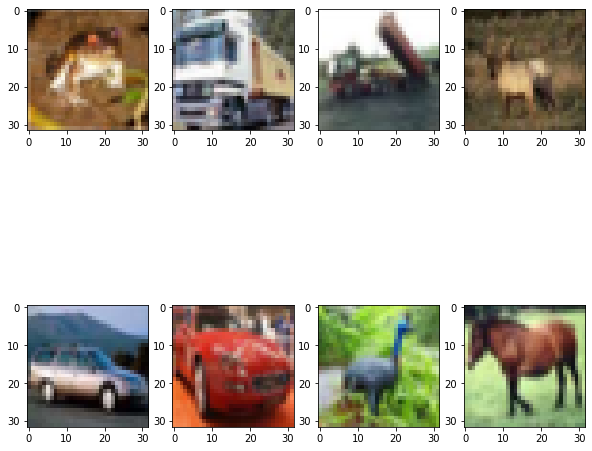

In [ ]:
# 데이터 시각화
plt.figure(figsize=(10,10))
for i, img in enumerate(x_train[:8]):
    plt.subplot(2,4, i+1) # plt의 index는 1부터
    plt.imshow(x_train[i]) 
plt.show()

In [ ]:
# y값 one-hot encoding
print(f"y_train original shape : {y_train.shape}")
y_train = keras.utils.to_categorical(y_train) # to_categorical()
print(f"y_train one-hot shape : {y_train.shape}")

y_train original shape : (50000, 1)
y_train one-hot shape : (50000, 10)


In [ ]:
# y test
y_test = keras.utils.to_categorical(y_test)

In [ ]:
# x_train = x_train / 255

In [ ]:
# normal model
model_1 = keras.Sequential([
        # conv_1
        keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32,32,3)),
        keras.layers.Conv2D(32, 3, 1, kernel_initializer="he_normal", activation="relu", padding="same"),
        keras.layers.Dropout(0.15),
        keras.layers.Conv2D(32, 3, 1, kernel_initializer="he_normal", activation="relu", padding="same"),
        keras.layers.MaxPooling2D(),
        # conv_2
        keras.layers.Conv2D(64, 3, 1, kernel_initializer="he_normal", activation="relu", padding="same"),
        keras.layers.Dropout(0.15),
        keras.layers.MaxPooling2D(),
        # conv_3
        keras.layers.Conv2D(64, 3, 1,kernel_initializer="he_normal", activation="relu", padding="same"),
        keras.layers.MaxPooling2D(),
        # conv_4
        keras.layers.Conv2D(128, 3, 1, kernel_initializer="he_normal", activation="relu", padding="same"),
        keras.layers.Dropout(0.15),
        keras.layers.Conv2D(128, 3, 1, kernel_initializer="he_normal", activation="relu", padding="same"),
        keras.layers.MaxPooling2D(),
        # FCL
        keras.layers.Flatten(),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(1024, kernel_initializer="he_normal", activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(512, kernel_initializer="he_normal", activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(10, activation="softmax")
]) 

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0

In [ ]:
model_1.compile(
    optimizer="adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
# 하이퍼 파라미터 설정 , 사람이 조절해주는 옵션값이 하이퍼 파라미터 입니다.
EPOCH = 1000
BATCH_SIZE = 256
es = keras.callbacks.EarlyStopping(patience=7)

In [ ]:
model_1.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCH,
    validation_split=0.2,
    shuffle=True,
    callbacks=[es]
)

In [ ]:
# test
loss, acc = model_1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8036 - accuracy: 0.7437


In [ ]:
model_2 = keras.Sequential([
        # conv_1
        keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32,32,3)),
        keras.layers.Conv2D(32, 3, 1, kernel_initializer="he_normal", activation="relu", padding="same"),
        keras.layers.Dropout(0.15),
        keras.layers.Conv2D(32, 3, 1, kernel_initializer="he_normal", activation="relu", padding="same"),
        keras.layers.MaxPooling2D(),
        # conv_2
        keras.layers.Conv2D(64, 3, 1, kernel_initializer="he_normal", activation="relu", padding="same"),
        keras.layers.Dropout(0.15),
        keras.layers.MaxPooling2D(),
        # conv_3
        keras.layers.Conv2D(64, 3, 1,kernel_initializer="he_normal", activation="relu", padding="same"),
        keras.layers.MaxPooling2D(),
        # conv_4
        keras.layers.Conv2D(128, 3, 1, kernel_initializer="he_normal", activation="relu", padding="same"),
        keras.layers.Dropout(0.15),
        keras.layers.Conv2D(128, 3, 1, kernel_initializer="he_normal", activation="relu", padding="same"),
        keras.layers.MaxPooling2D(),
        # GAP
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(10, activation="softmax")
]) 

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 64)       

In [ ]:
model_2.compile(
    optimizer="adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
model_2.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCH,
    validation_split=0.2,
    shuffle=True,
    callbacks=[es]
)

Epoch 1/1000
157/157 [==============================] - 5s 27ms/step - loss: 1.9312 - accuracy: 0.2853 - val_loss: 1.6459 - val_accuracy: 0.4215
Epoch 2/1000
157/157 [==============================] - 4s 25ms/step - loss: 1.4709 - accuracy: 0.4602 - val_loss: 1.4446 - val_accuracy: 0.4921
Epoch 3/1000
157/157 [==============================] - 4s 25ms/step - loss: 1.2971 - accuracy: 0.5277 - val_loss: 1.3709 - val_accuracy: 0.5251
Epoch 4/1000
157/157 [==============================] - 4s 25ms/step - loss: 1.1577 - accuracy: 0.5849 - val_loss: 1.1320 - val_accuracy: 0.6095
Epoch 5/1000
157/157 [==============================] - 4s 25ms/step - loss: 1.0434 - accuracy: 0.6282 - val_loss: 1.0884 - val_accuracy: 0.6203
Epoch 6/1000
157/157 [==============================] - 4s 25ms/step - loss: 0.9462 - accuracy: 0.6654 - val_loss: 0.9653 - val_accuracy: 0.6556
Epoch 7/1000
157/157 [==============================] - 4s 25ms/step - loss: 0.8611 - accuracy: 0.6969 - val_loss: 0.8986 - val_ac

In [ ]:
loss, acc = model_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9106 - accuracy: 0.7441


In [ ]:
# + batch norm
model_2_batch = keras.Sequential([
        # conv_1
        keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32,32,3)),
        keras.layers.Conv2D(32, 3, 1, kernel_initializer="he_normal", padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.Conv2D(32, 3, 1, kernel_initializer="he_normal", padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.MaxPooling2D(),
        # conv_2
        keras.layers.Conv2D(64, 3, 1, kernel_initializer="he_normal", padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.MaxPooling2D(),
        # conv_3
        keras.layers.Conv2D(64, 3, 1,kernel_initializer="he_normal", padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.MaxPooling2D(),
        # conv_4
        keras.layers.Conv2D(128, 3, 1, kernel_initializer="he_normal", padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.Conv2D(128, 3, 1, kernel_initializer="he_normal", padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPooling2D(),
        # GAP
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model_2_batch.compile(
    optimizer="adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
model_2_batch.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCH,
    validation_split=0.2,
    shuffle=True,
    callbacks=[es]
)

Epoch 1/1000
157/157 [==============================] - 6s 32ms/step - loss: 1.3510 - accuracy: 0.5186 - val_loss: 2.0885 - val_accuracy: 0.2918
Epoch 2/1000
157/157 [==============================] - 5s 29ms/step - loss: 0.9475 - accuracy: 0.6644 - val_loss: 1.3263 - val_accuracy: 0.5525
Epoch 3/1000
157/157 [==============================] - 4s 29ms/step - loss: 0.7620 - accuracy: 0.7333 - val_loss: 1.0173 - val_accuracy: 0.6397
Epoch 4/1000
157/157 [==============================] - 5s 29ms/step - loss: 0.6366 - accuracy: 0.7789 - val_loss: 1.0291 - val_accuracy: 0.6479
Epoch 5/1000
157/157 [==============================] - 5s 29ms/step - loss: 0.5397 - accuracy: 0.8171 - val_loss: 0.8431 - val_accuracy: 0.7154
Epoch 6/1000
157/157 [==============================] - 5s 29ms/step - loss: 0.4596 - accuracy: 0.8449 - val_loss: 1.1248 - val_accuracy: 0.6482
Epoch 7/1000
157/157 [==============================] - 5s 29ms/step - loss: 0.3840 - accuracy: 0.8726 - val_loss: 0.8095 - val_ac

In [ ]:
model_2_batch.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)       

In [ ]:
loss, acc = model_2_batch.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0383 - accuracy: 0.7279


In [ ]:
# BN이 validation 성능을 많이 악화시킨다면, train 데이터와 동일한 분포에서 추출되지 않았을 수 있습니다.

In [ ]:
# image augmentation 
augment = keras.Sequential([
      keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
      keras.layers.experimental.preprocessing.RandomRotation(0.2),
      keras.layers.experimental.preprocessing.RandomZoom(0.1)                      
])

In [ ]:
model_2_augment = keras.Sequential([
        # conv_1
        keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32,32,3)),
        # augmentation
        augment,
        keras.layers.Conv2D(32, 3, 1, kernel_initializer="he_normal", padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.Conv2D(32, 3, 1, kernel_initializer="he_normal", padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.MaxPooling2D(),
        # conv_2
        keras.layers.Conv2D(64, 3, 1, kernel_initializer="he_normal", padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.MaxPooling2D(),
        # conv_3
        keras.layers.Conv2D(64, 3, 1,kernel_initializer="he_normal", padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.MaxPooling2D(),
        # conv_4
        keras.layers.Conv2D(128, 3, 1, kernel_initializer="he_normal", padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.Conv2D(128, 3, 1, kernel_initializer="he_normal", padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPooling2D(),
        # GAP
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model_2_augment.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 32, 32, 3)         0         
_________________________________________________________________
sequential (Sequential)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)       

In [ ]:
model_2_augment.compile(
    optimizer="adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
model_2_augment.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCH,
    validation_split=0.2,
    shuffle=True,
    callbacks=[es]
)

In [ ]:
# ImageGenrator
img_gen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [ ]:
# seed 고정
np.random.seed(123)

In [ ]:
# index 만들기
val_index = np.random.choice(np.arange(0, 50000), 10000, replace=False) # 0 ~ 50000 중에서 10000개 비복원추출

In [ ]:
train_index = list(set(np.arange(0,50000)) - set(val_index))  # set의 차집합 사용

In [ ]:
len(val_index), len(train_index)

(10000, 40000)

In [ ]:
x_train_2 = x_train[train_index]
y_train_2 = y_train[train_index]
x_val_2 = x_train[val_index]
y_val_2 = y_train[val_index]

In [ ]:
# 이미지 제너레이터 학습
model_2.fit(
    img_gen.flow(x_train_2, y_train_2, batch_size=BATCH_SIZE), # img_gen.flow(데이터를 넣어주세요)
    steps_per_epoch = len(x_train_2) / BATCH_SIZE, epochs=EPOCH, validation_data=(x_val_2, y_val_2),
    callbacks=[es]
)

Epoch 1/1000
156/156 [==============================] - 20s 120ms/step - loss: 1.9294 - accuracy: 0.2961 - val_loss: 1.7280 - val_accuracy: 0.3792
Epoch 2/1000
156/156 [==============================] - 18s 118ms/step - loss: 1.5756 - accuracy: 0.4236 - val_loss: 1.4614 - val_accuracy: 0.4819
Epoch 3/1000
156/156 [==============================] - 18s 117ms/step - loss: 1.4338 - accuracy: 0.4818 - val_loss: 1.3496 - val_accuracy: 0.5261
Epoch 4/1000
156/156 [==============================] - 19s 121ms/step - loss: 1.3377 - accuracy: 0.5189 - val_loss: 1.2244 - val_accuracy: 0.5712
Epoch 5/1000
156/156 [==============================] - 18s 117ms/step - loss: 1.2306 - accuracy: 0.5605 - val_loss: 1.1127 - val_accuracy: 0.6072
Epoch 6/1000
156/156 [==============================] - 19s 121ms/step - loss: 1.1507 - accuracy: 0.5907 - val_loss: 1.0967 - val_accuracy: 0.6092
Epoch 7/1000
156/156 [==============================] - 19s 120ms/step - loss: 1.1026 - accuracy: 0.6092 - val_loss: 1

KeyboardInterrupt: ignored

In [ ]:
# transfer learning
# pre_trained model 불러오기
# 주의사항 : efficientnet은 모델안에 rescale 이 걸려있어서 이미지를 정규화고 넣으면 안된다
base_model = keras.applications.EfficientNetB0(
    include_top = False, # top을 제거한다
    weights = "imagenet" , # 이미 imagenet 데이터를 학습한 가중치가 있는 모델로 불러라
    input_shape = (32,32,3), # 우리가 가진 이미지의 shape
    pooling="avg"
)

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
# 모델 전체 freeze
base_model.trainable = False

In [ ]:
# 되살리기
base_model.trainable = True

In [ ]:
# 특정 layer만 죽이기
base_model.layers[5].trainable = False

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 32, 32, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 32, 32, 3)    7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 33, 33, 3)    0           normalization[0][0]              
_____________________________________________________________________________________

In [ ]:
model_3 = keras.Sequential([
      base_model,
      keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 1280)              4049571   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                12810     
Total params: 4,062,381
Trainable params: 4,020,294
Non-trainable params: 42,087
_________________________________________________________________


In [ ]:
model_3.compile(
    optimizer="adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
# transfer learning 학습
model_3.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCH,
    validation_split=0.2,
    shuffle=True,
    callbacks=[es]
)

Epoch 1/1000
157/157 [==============================] - 24s 93ms/step - loss: 1.1013 - accuracy: 0.6220 - val_loss: 0.8445 - val_accuracy: 0.7047
Epoch 2/1000
157/157 [==============================] - 12s 76ms/step - loss: 0.5853 - accuracy: 0.7963 - val_loss: 0.6522 - val_accuracy: 0.7813
Epoch 3/1000
157/157 [==============================] - 12s 76ms/step - loss: 0.4172 - accuracy: 0.8553 - val_loss: 0.6182 - val_accuracy: 0.7959
Epoch 4/1000
157/157 [==============================] - 12s 76ms/step - loss: 0.3055 - accuracy: 0.8939 - val_loss: 0.6690 - val_accuracy: 0.8055
Epoch 5/1000
157/157 [==============================] - 12s 76ms/step - loss: 0.2425 - accuracy: 0.9144 - val_loss: 0.7322 - val_accuracy: 0.7892
Epoch 6/1000
157/157 [==============================] - 12s 78ms/step - loss: 0.1889 - accuracy: 0.9340 - val_loss: 0.7710 - val_accuracy: 0.8025
Epoch 7/1000
157/157 [==============================] - 12s 76ms/step - loss: 0.1720 - accuracy: 0.9405 - val_loss: 0.8075 -

In [ ]:
loss, acc =model_3.evaluate(x_test, y_test)

313/313 [==============================] - 5s 13ms/step - loss: 0.8973 - accuracy: 0.8077
